In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

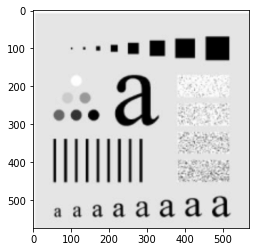

In [3]:
img = cv2.imread('../../images/Alphabet.png', 0)
plt.imshow(img, cmap='gray');
plt.imsave('original.png', img, cmap='gray')

# Ideal HPF

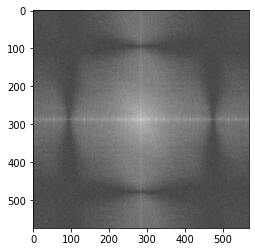

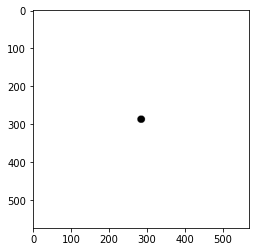

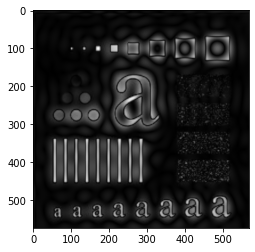

In [8]:
# implement ideal high pass filter
def ideal_hpf(img:np.ndarray, D0) -> np.ndarray:
    M, N = img.shape
    U, V = img.shape

    X = np.fft.fft2(img)
    X = np.fft.fftshift(X)
    
    H = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = (u - U/2)**2 + (v - V/2)**2
            if D >= D0**2:
                H[u, v] = 1
            else:
                H[u, v] = 0
    Y = X * H

    y = np.fft.ifftshift(Y)
    y = np.fft.ifft2(y)
    y = np.abs(y)
    return X, H, y


X, H, y_ideal = ideal_hpf(img, 10)

plt.imshow(np.log(np.abs(X)), cmap='gray');
plt.show()
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(y_ideal, cmap='gray');
plt.imsave('ideal_hpf.png', y_ideal, cmap='gray')

# Butterworth HPF

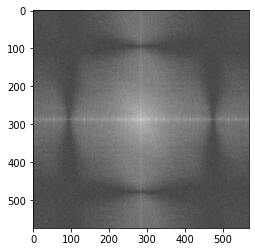

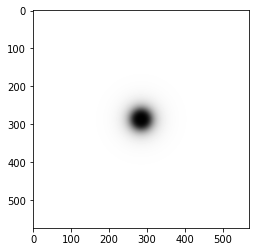

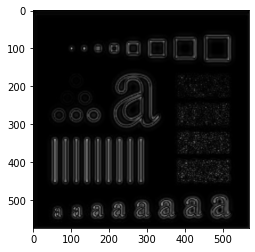

In [10]:
# Implement Butterworth high pass filter
def butterworth_hpf(img:np.ndarray, D0, n) -> np.ndarray:
    M, N = img.shape
    U, V = img.shape

    X = np.fft.fft2(img)
    X = np.fft.fftshift(X)
    
    H = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = np.sqrt((u - U/2)**2 + (v - V/2)**2)
            H[u, v] = 1 / (1 + (D0 / D)**(2*n))
    Y = X * H

    y = np.fft.ifftshift(Y)
    y = np.fft.ifft2(y)
    y = np.abs(y)
    return X, H, y

X, H, y_butterworth = butterworth_hpf(img, 30, 2)
plt.imshow(np.log(np.abs(X)), cmap='gray');
plt.show()
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(y_butterworth, cmap='gray');
plt.imsave('butterworth_hpf.png', y_butterworth, cmap='gray')

# Gaussian HPF

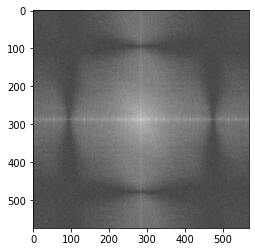

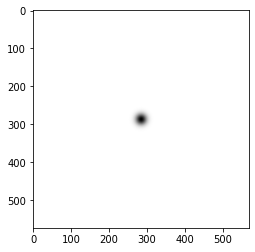

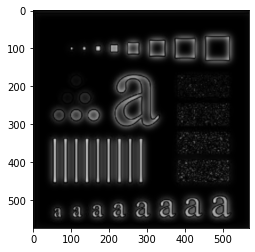

In [13]:
# Implement Gaussian high pass filter
def gaussian_hpf(img:np.ndarray, D0) -> np.ndarray:
    M, N = img.shape
    U, V = img.shape

    X = np.fft.fft2(img)
    X = np.fft.fftshift(X)
    
    H = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = np.sqrt((u - U/2)**2 + (v - V/2)**2)
            H[u, v] = 1- np.exp(-D**2 / (2 * D0**2))
    Y = X * H

    y = np.fft.ifftshift(Y)
    y = np.fft.ifft2(y)
    y = np.abs(y)
    return X, H, y

X, H, y_gaussian = gaussian_hpf(img, 10)
plt.imshow(np.log(np.abs(X)), cmap='gray');
plt.show()
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(y_gaussian, cmap='gray');
plt.show()
plt.imsave('gaussian_hpf.png', y_gaussian, cmap='gray')